# Unsupervised Learning on Country Data - Final Project

## University of Colorado Boulder

## Table Of Content:
* [Introduction](#Introduction)
* [EDA](#EDA)
* [Models](#Models)
* [Summary and closing thoughts](#Summary-and-closing-thoughts)
* [References](#References)

# Introduction 

HELP International is an international humanitarian NGO that is committed to fighting poverty.

In this project, I will be focusing on utilizing unsupervised learning techniques and methods to analyze and categorize countries based on critical socio-economic and health factors. 

By looking into metrics such as child mortality rates, health spending, GDP per capita, inflation, and fertility rates, I try to find patterns and insights that can help with decision-making. **The goal is to create meaningful clusters that highlight nations most in need of aid.**

Before we head to EDA, here are the features of this dataset:

#### Data Attributes/Features
- country: Name of the country.
- child_mort: Deaths of children under 5 years of age per 1,000 live births.
- exports: Exports of goods and services per capita, expressed as a percentage of GDP per capita.
- health: Total health spending per capita, expressed as a percentage of GDP per capita.
- imports: Imports of goods and services per capita, expressed as a percentage of GDP per capita.
- income: Net income per person.
- inflation: Annual growth rate of the total GDP.
- life_expec: Average number of years a newborn child is expected to live, based on current mortality patterns.
- total_fer: Number of children that would be born to each woman if current age-fertility rates remain unchanged.
- gdpp: GDP per capita, calculated as total GDP divided by total population.

GitHub link: https://github.com/ammarhameed/DTSA-5510

Dataset link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data

# EDA

#### Imports and Data loading

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import coo_matrix, csr_matrix
from scipy.spatial.distance import jaccard, cosine 
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [10]:
data = pd.read_csv('archive/Country-data.csv')

#### Data check and cleaning

In [17]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [16]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

We see here an average child mortality rate of **38.27**. Income averages **$17,144**.

Exports and imports are around **41.11** and **46.89**. Inflation averages **7.78**, life expectancy is **70.56** years.


In [22]:
highest_child_mortality = data.loc[data['child_mort'].idxmax()]

print(f"Country with the highest child mortality rate: {highest_child_mortality['country']}, "
      f"Child Mortality Rate: {highest_child_mortality['child_mort']}")

lowest_child_mortality = data.loc[data['child_mort'].idxmin()]

print(f"Country with the lowest child mortality rate: {lowest_child_mortality['country']}, "
      f"Child Mortality Rate: {lowest_child_mortality['child_mort']}")

Country with the highest child mortality rate: Haiti, Child Mortality Rate: 208.0
Country with the lowest child mortality rate: Iceland, Child Mortality Rate: 2.6


As you can see above, **Haiti with the highest child mortality rate at 208.0**, while **Iceland** has the lowest.

In [6]:
print(data.shape)

(167, 10)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [10]:
# I will be removing rows with missing values
data.dropna(inplace=True)

In [47]:
# Check for duplicates 
print(data.duplicated().sum())

0


## Visualization

I started first with plotting the distribution of the continues variables alog with their box plots, for children mortality in the graphs above, we can see that the data is skewed to the right which mean that most countries have lower child mortality, smaller of number of countries have significantly higher rates.

As for life expectancy, it is left skewed which means that most countries have higher life expectancy rates, while a smaller number of countries have significantly lower rates.

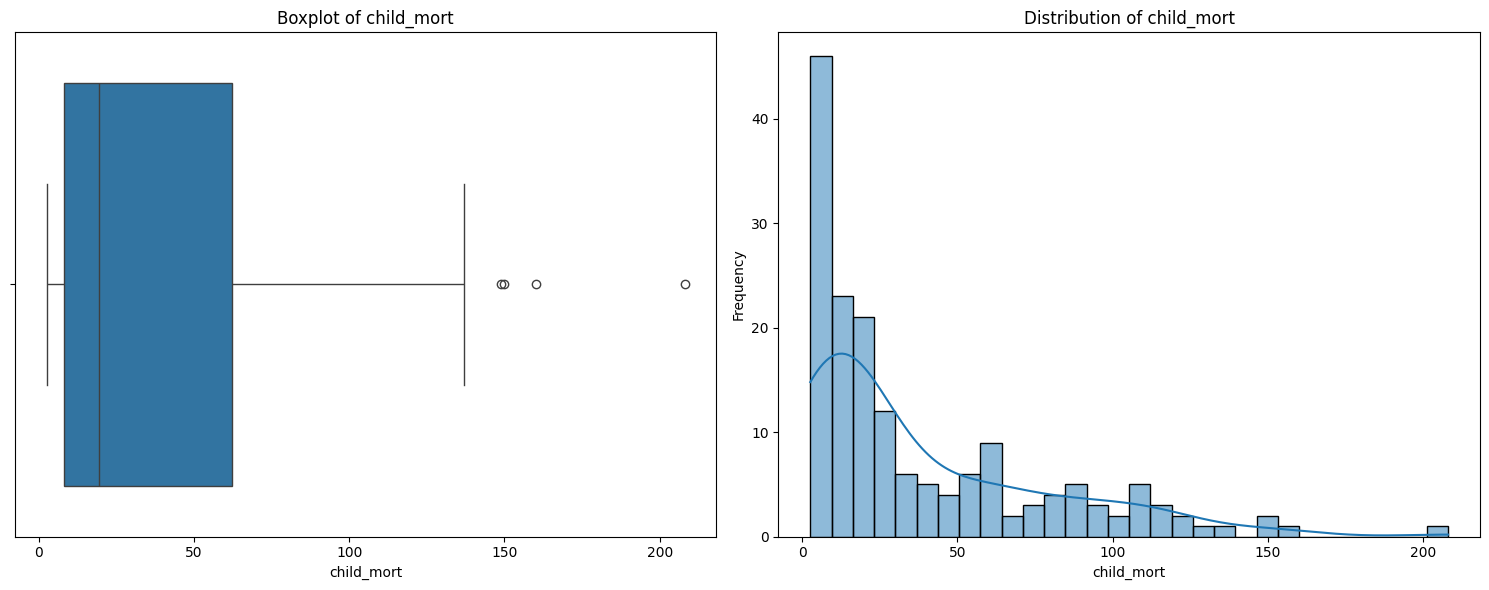

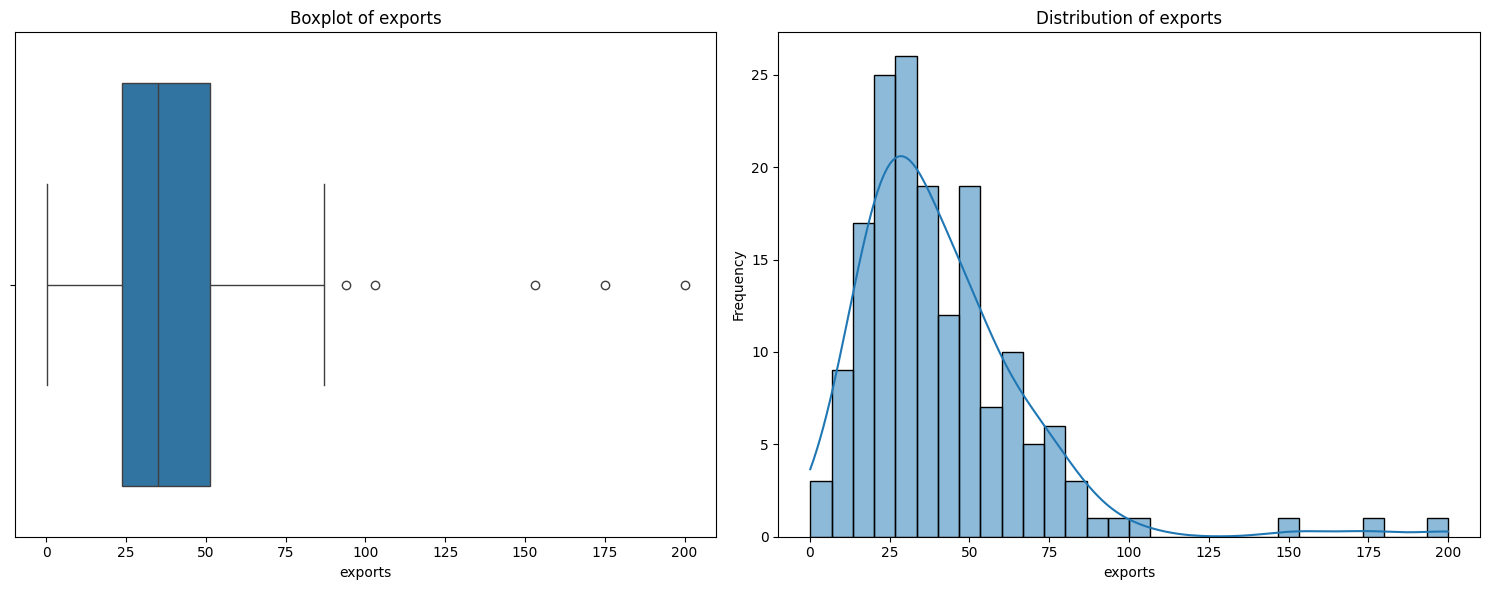

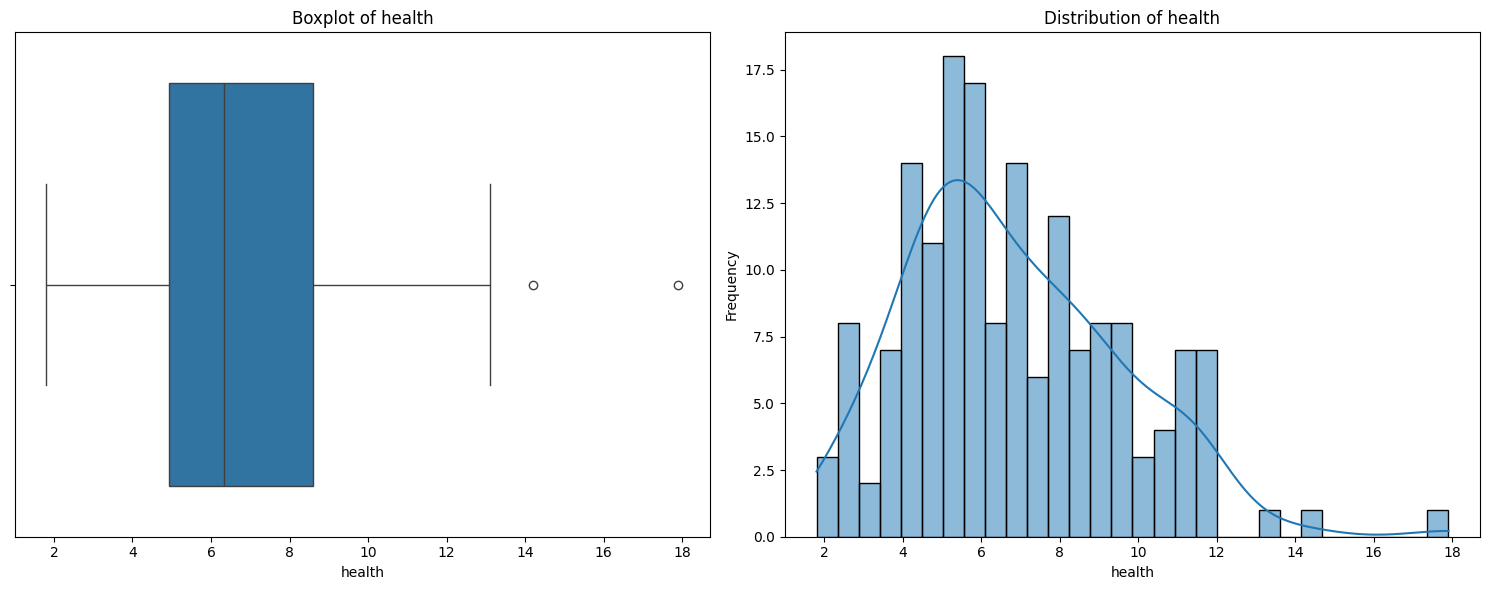

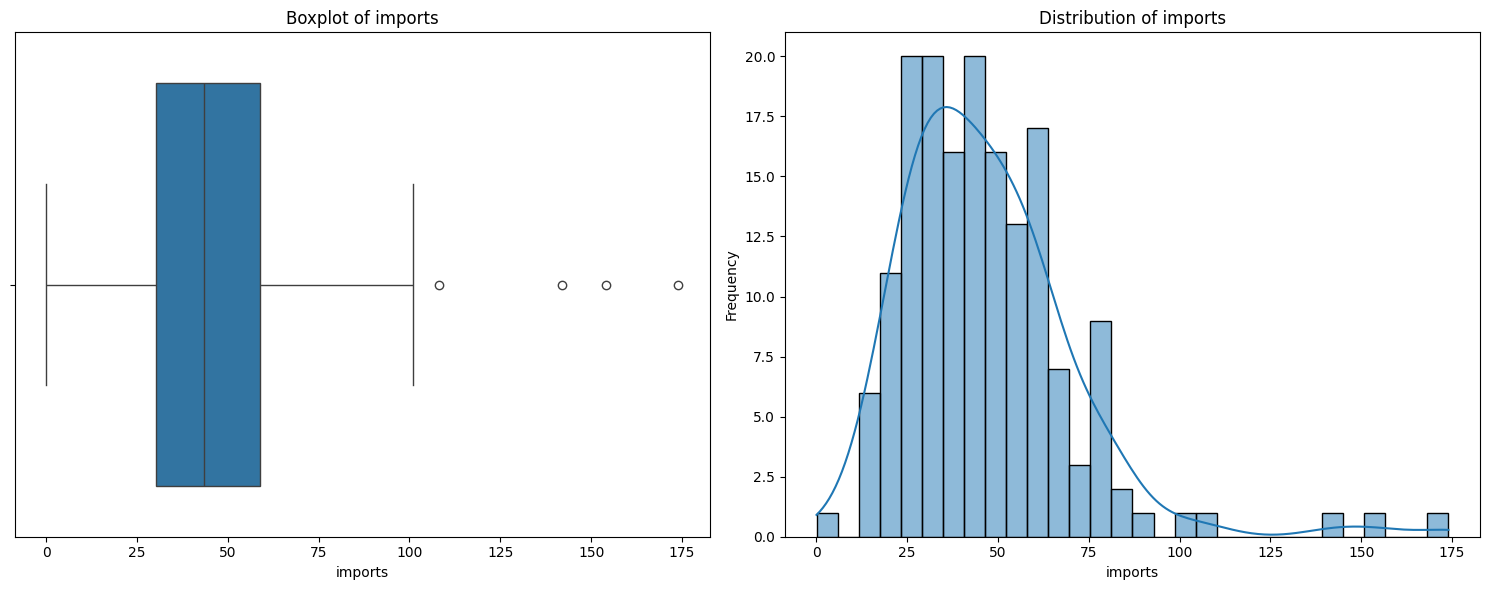

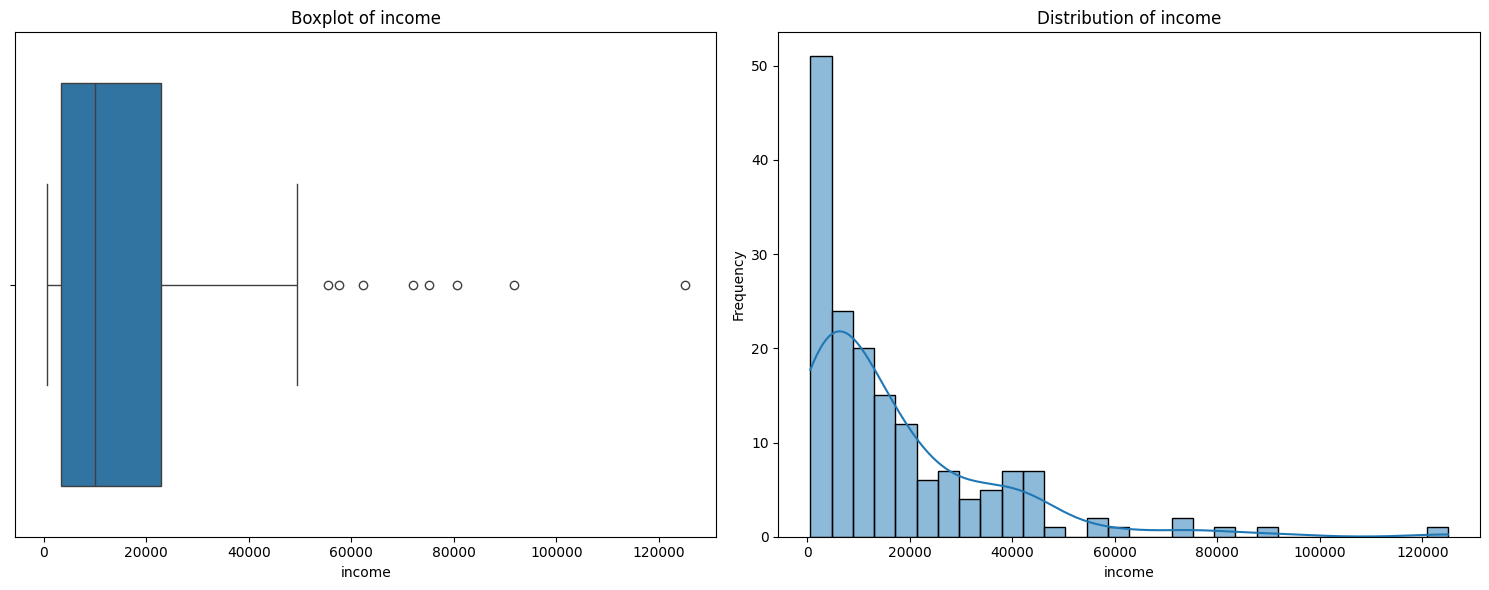

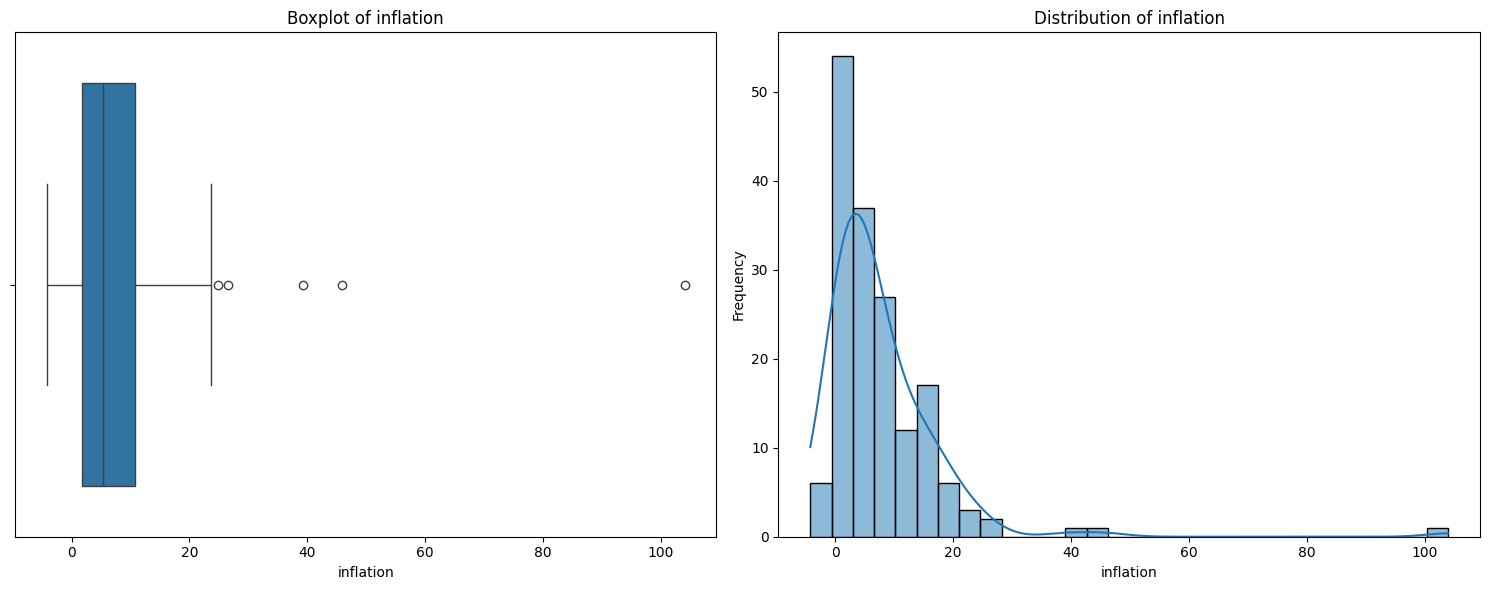

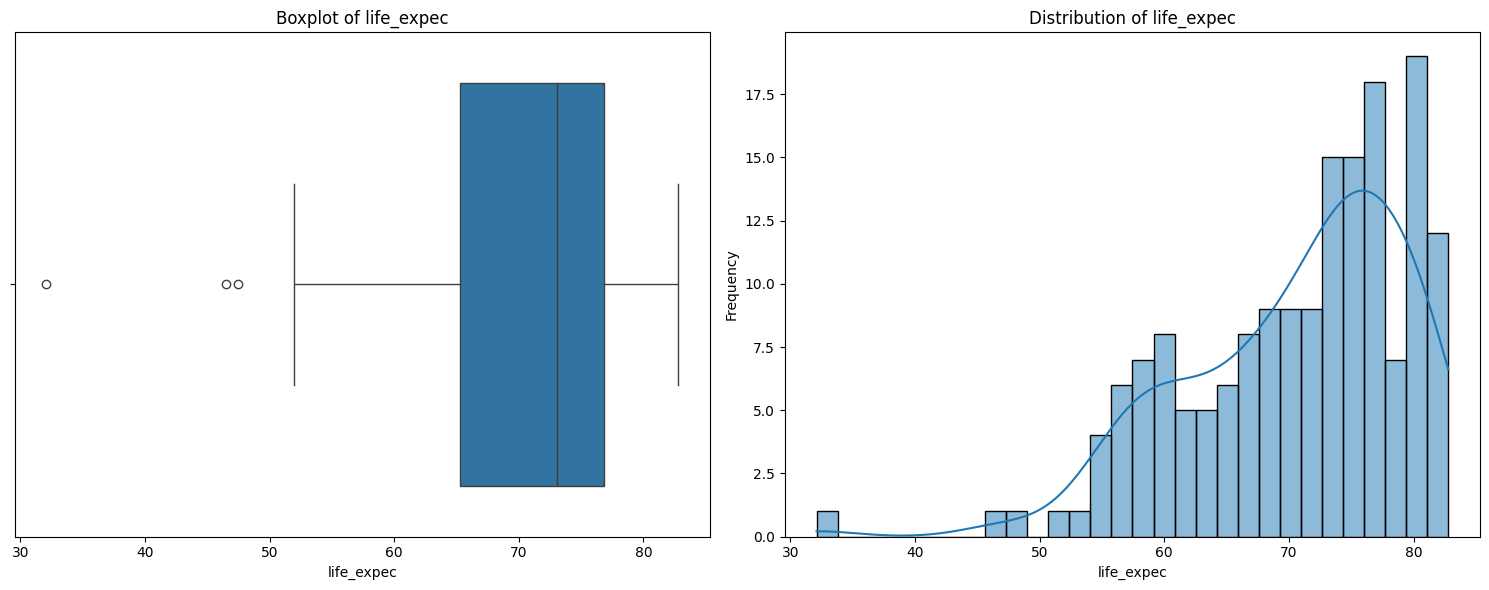

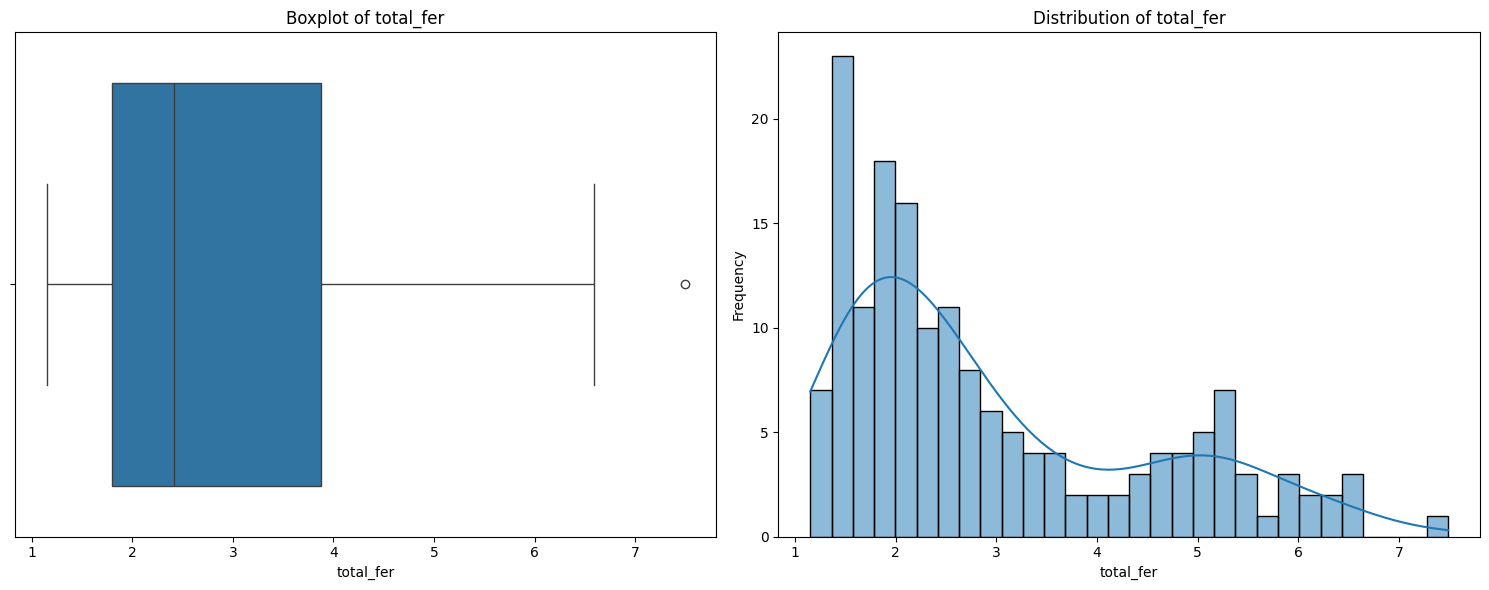

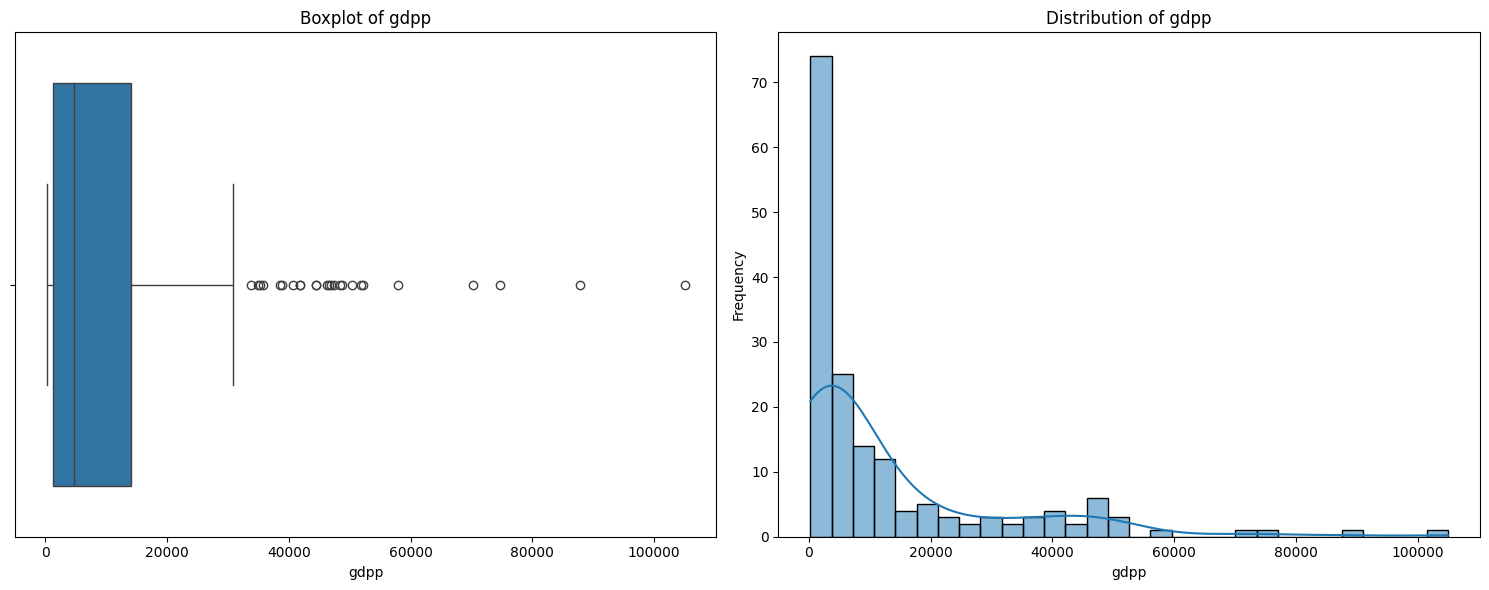

In [12]:
continuous_vars = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for var in continuous_vars:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    sns.boxplot(x=data[var], ax=axes[0])
    axes[0].set_title(f'Boxplot of {var}')
    
    sns.histplot(data[var], bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {var}')
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


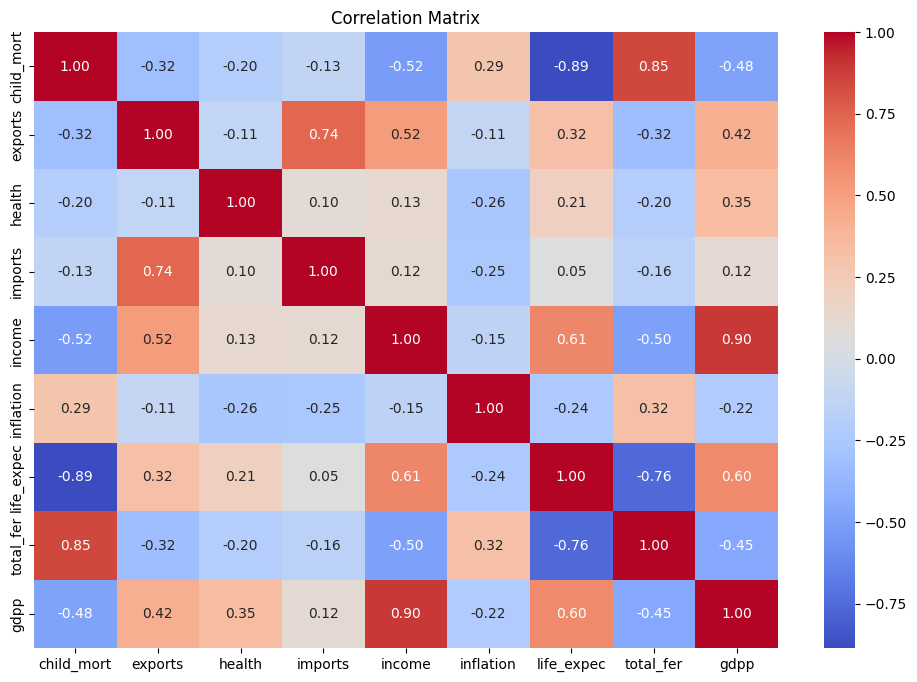

In [13]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

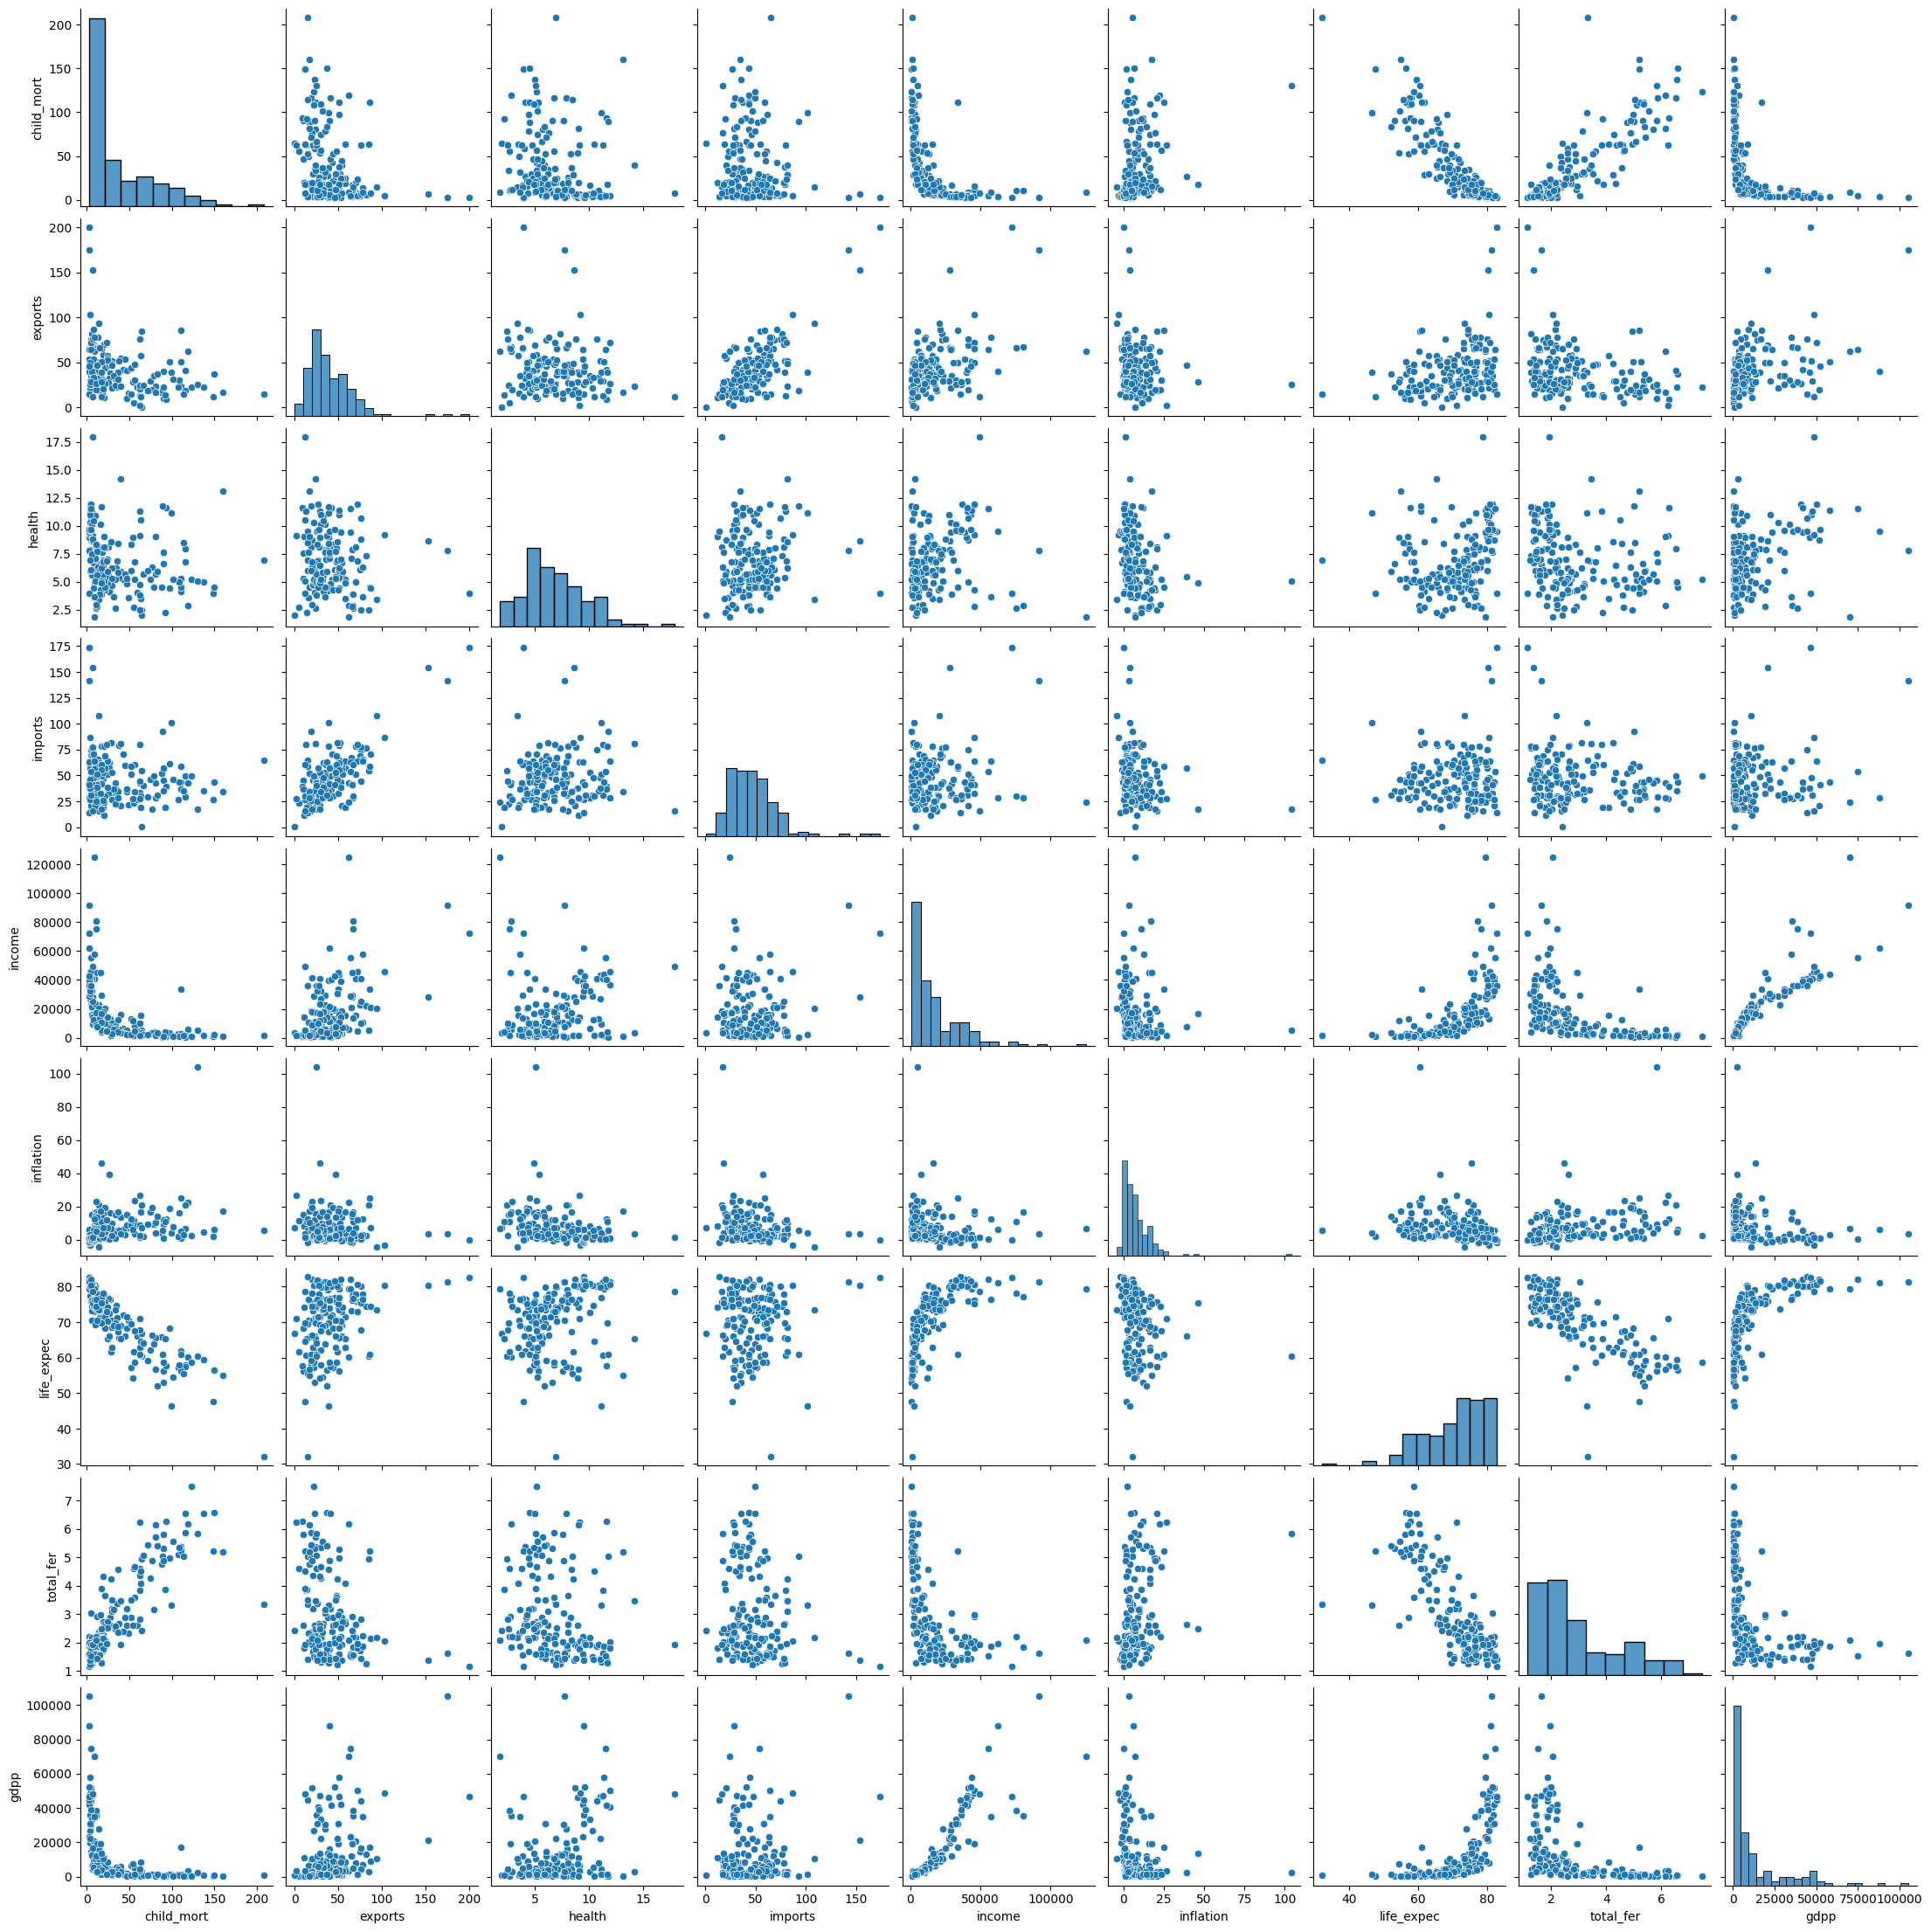

In [14]:
sns.pairplot(data[continuous_vars])
plt.show()


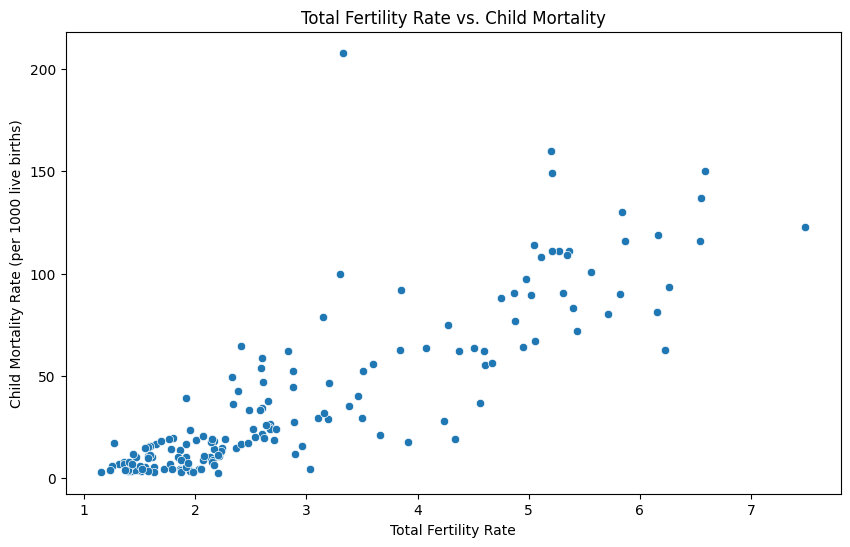

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_fer', y='child_mort')
plt.title('Total Fertility Rate vs. Child Mortality')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Child Mortality Rate (per 1000 live births)')
plt.show()

I wanted to focus on `total fertility rate` and `child mortality rate` here, as the graph suggests that as the total fertility rate increases, the child mortality rate also tends to increase, this could be for multiple factors like, `Resource Allocation`, `Healthcare Access` and `Socioeconomic Factors`

# Models

#### PCA

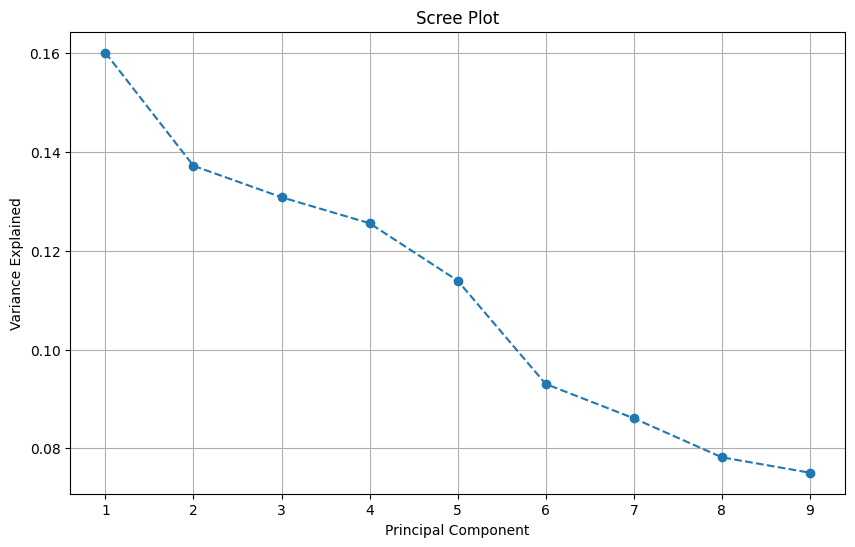

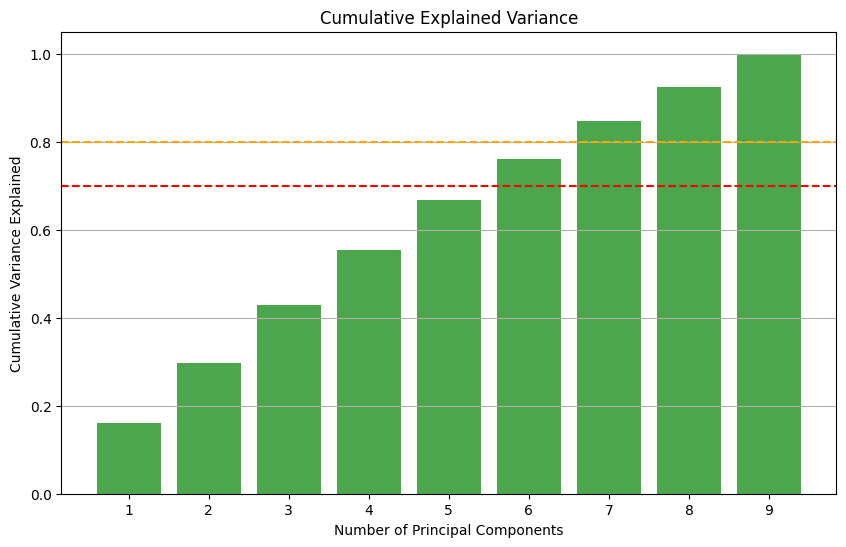

In [16]:
features = pd.DataFrame(np.random.rand(100, 9), columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
pca.fit(features_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.7, color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(axis='y')
plt.axhline(y=0.7, color='r', linestyle='--')  
plt.axhline(y=0.8, color='orange', linestyle='--') 
plt.show()

In the above cumulative Explained Variance graph, we can see that 80% of the variance is exaplained by PCA 1 to 6, but I decided to go with
all of them since it's not very clear, we can also see that in the above plots

So I will continue with all variables in mind

### K-Means

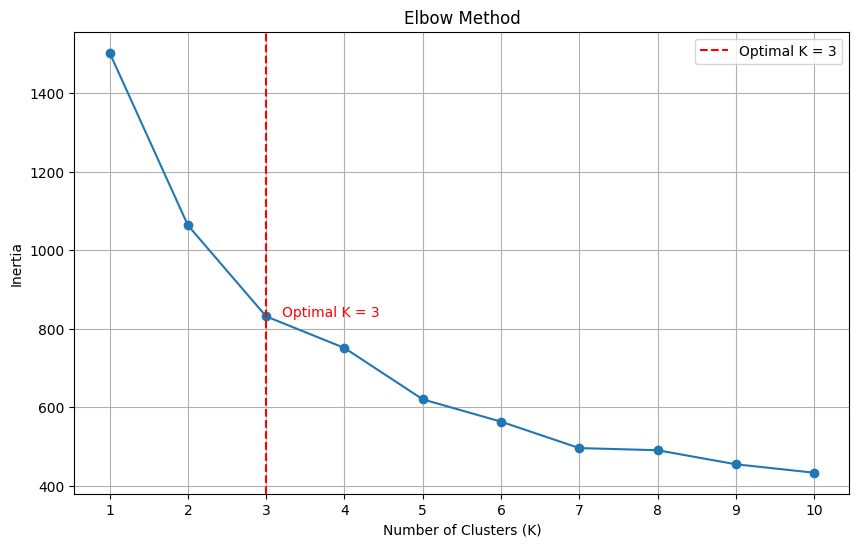

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        2  
4       1.44        76.8       2.13  12200        0  


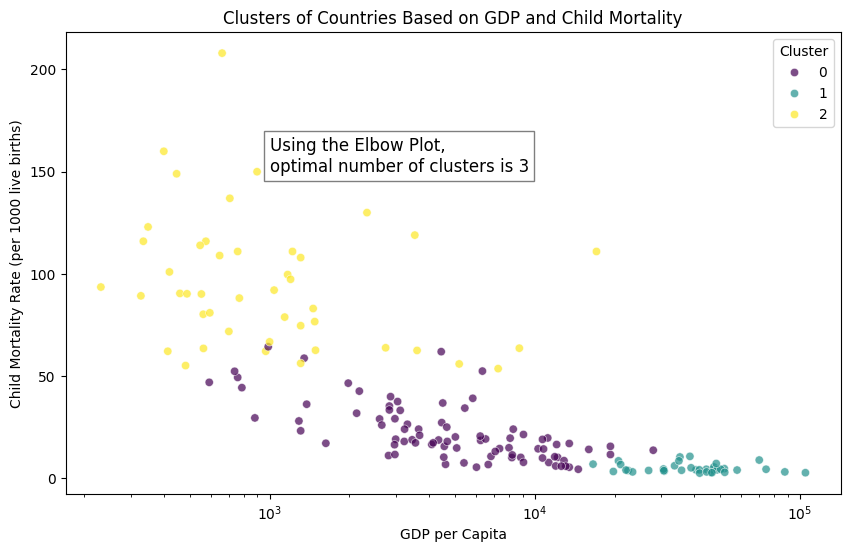

In [17]:
columns_to_use = ['child_mort', 'health', 'income', 'life_expec', 'total_fer', 'gdpp']
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

data_subset = data[features].dropna()  

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_subset)

inertia = []
range_k = range(1, 11)   

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.grid()

optimal_k = 3   
plt.axvline(optimal_k, color='red', linestyle='--', label='Optimal K = 3')
plt.text(optimal_k + 0.2, inertia[optimal_k-1], 'Optimal K = 3', color='red')

plt.legend()
plt.show()

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

print(data[['country'] + features + ['Cluster']].head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdpp', y='child_mort', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters of Countries Based on GDP and Child Mortality')
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality Rate (per 1000 live births)')

plt.text(1e3, 150, 'Using the Elbow Plot,\noptimal number of clusters is 3', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(title='Cluster')
plt.show()


### Hierarchical Clustering

In the following cell I'm doing a hierarchical clustering on a datase based on child mortality, GDP per capita and then I have included multiple features as shown below and then I'm finally graphing the cluster on the world map to help understand the child mortality.

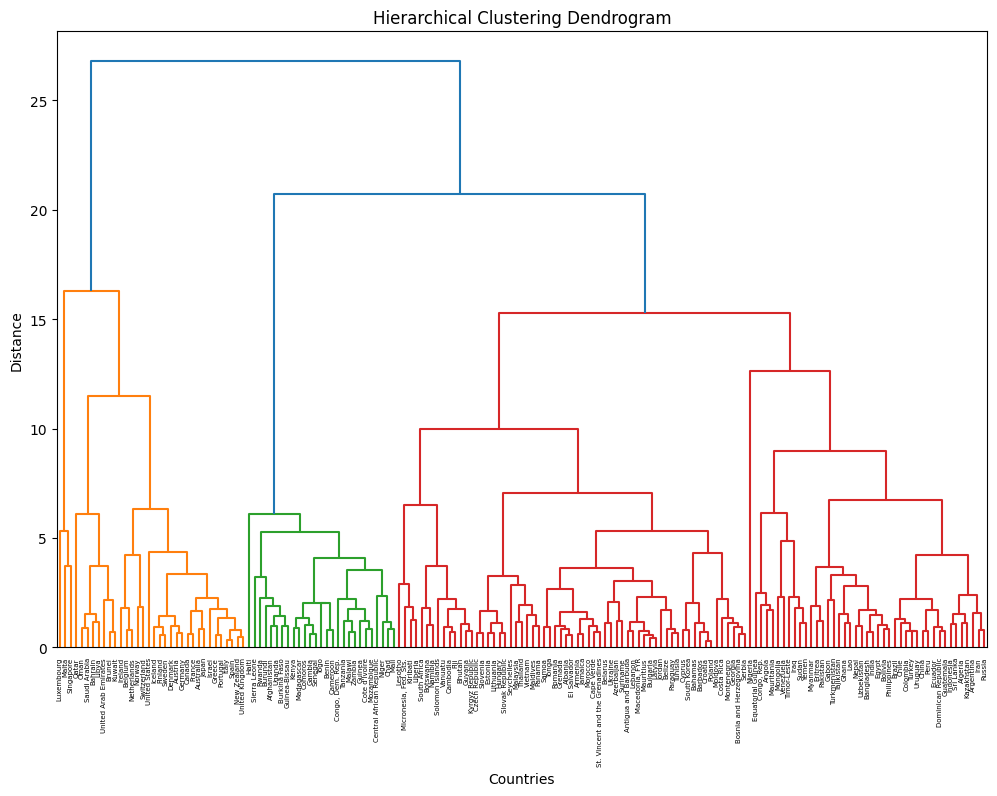

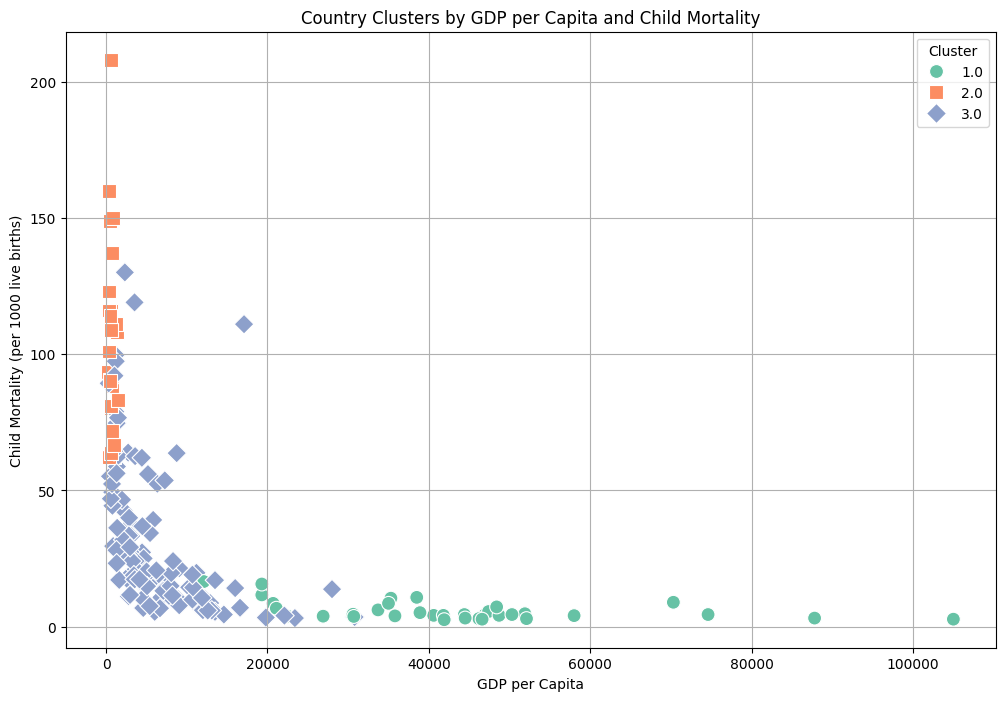

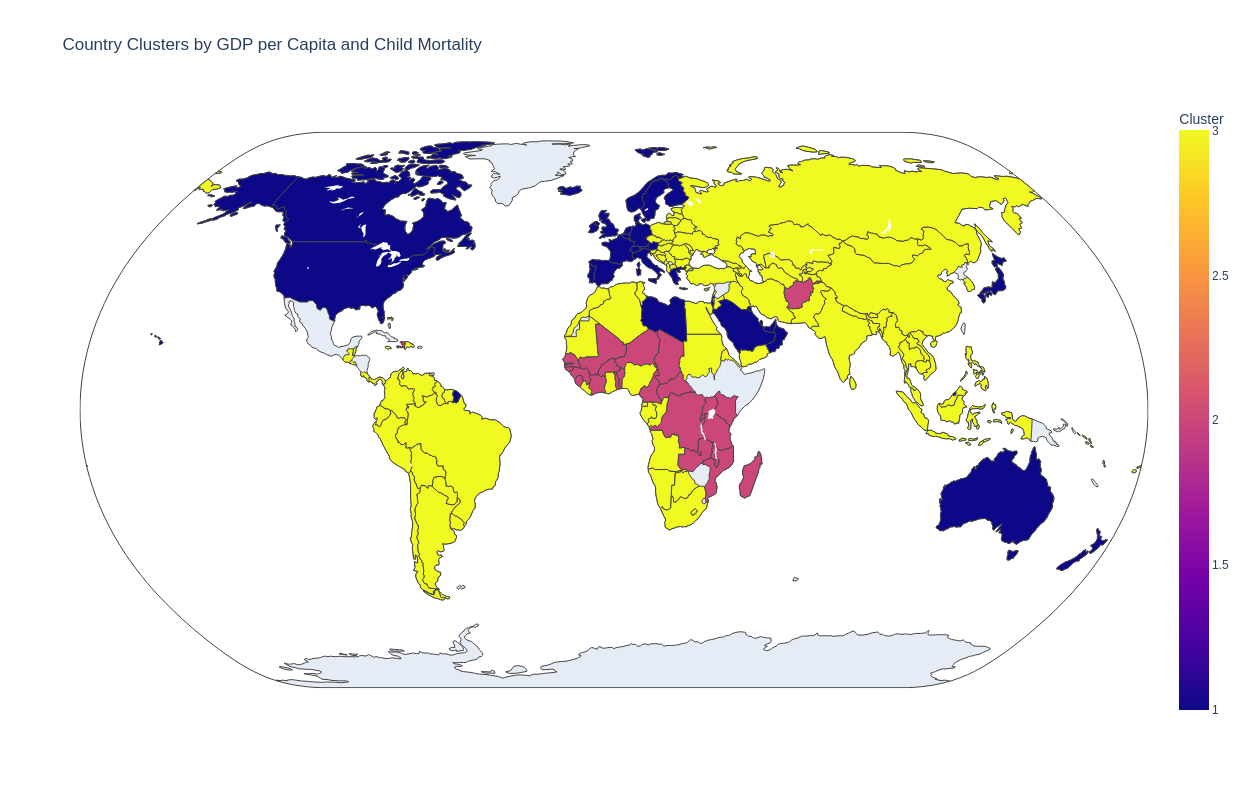

In [19]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = data[features].dropna() 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data['country'].values[X.index], leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

threshold = 20  
clusters = fcluster(Z, threshold, criterion='distance')

data['cluster'] = np.nan
data.loc[X.index, 'cluster'] = clusters

plt.figure(figsize=(12, 8))

markers = ['o', 's', 'D', 'X', '^', 'P'] 

sns.scatterplot(data=data, x='gdpp', y='child_mort', 
                hue='cluster', palette='Set2', 
                style='cluster', markers=markers[:len(data['cluster'].unique())], 
                s=100)

plt.title('Country Clusters by GDP per Capita and Child Mortality')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality (per 1000 live births)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

fig = px.choropleth(data_frame=data,
                    locations='country',  
                    locationmode='country names',  
                    color='cluster', 
                    hover_name='country',  
                    color_continuous_scale=px.colors.sequential.Plasma,  
                    title='Country Clusters by GDP per Capita and Child Mortality',
                    labels={'cluster': 'Cluster'},
                    projection='natural earth')

fig.update_layout(width=1200, height=800)  
fig.show()

#### Hyperparameters fine-tuning

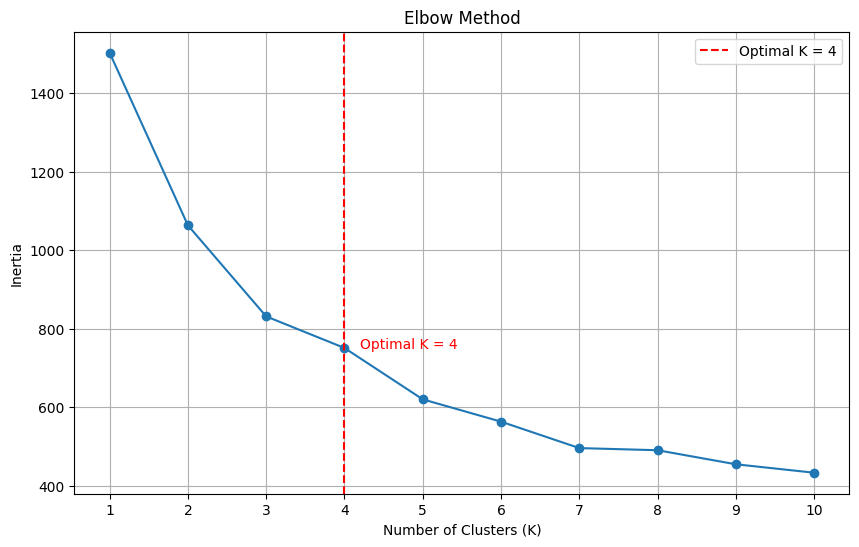

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        2  
4       1.44        76.8       2.13  12200        0  


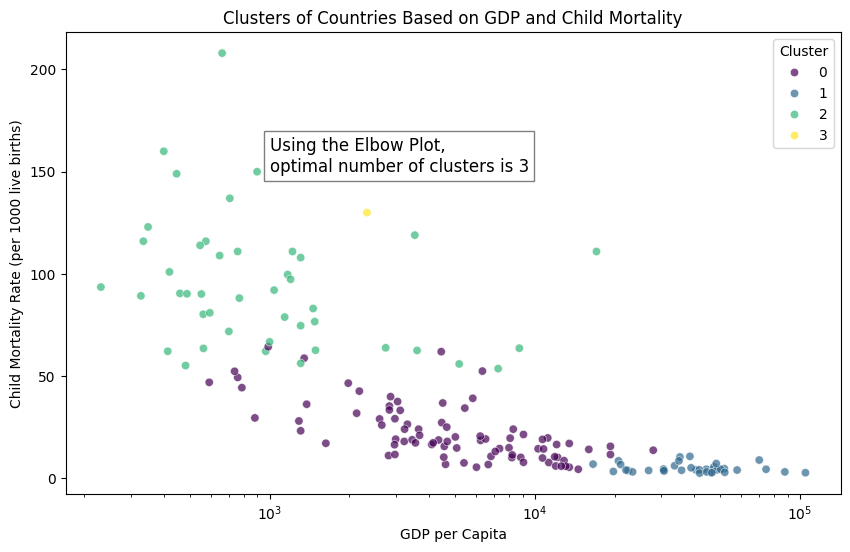

In [52]:
columns_to_use = ['child_mort', 'health', 'income', 'life_expec', 'total_fer', 'gdpp']
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

data_subset = data[features].dropna()  

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_subset)

inertia = []
range_k = range(1, 11)   

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.grid()

optimal_k = 4  
plt.axvline(optimal_k, color='red', linestyle='--', label='Optimal K = 4')
plt.text(optimal_k + 0.2, inertia[optimal_k-1], 'Optimal K = 4', color='red')

plt.legend()
plt.show()

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

print(data[['country'] + features + ['Cluster']].head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdpp', y='child_mort', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters of Countries Based on GDP and Child Mortality')
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality Rate (per 1000 live births)')

plt.text(1e3, 150, 'Using the Elbow Plot,\noptimal number of clusters is 3', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(title='Cluster')
plt.show()

As you can see above, it didn't give much better results

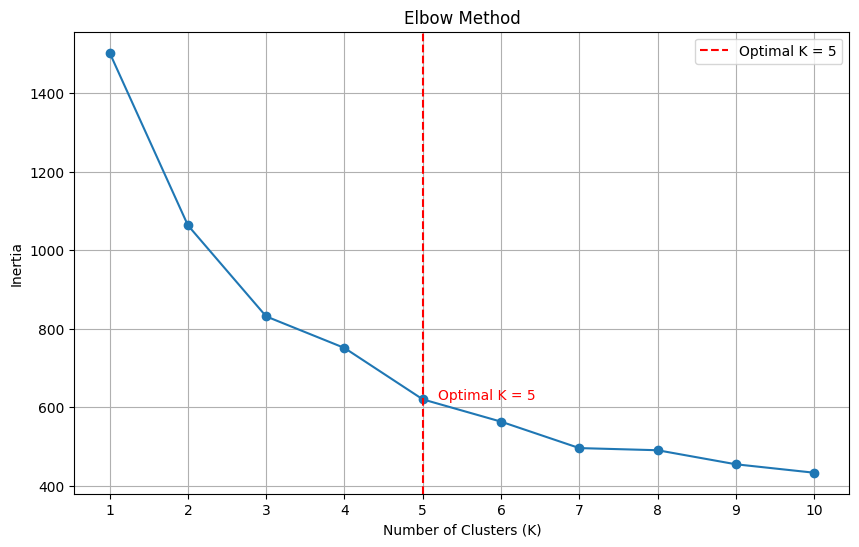

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        2  
4       1.44        76.8       2.13  12200        0  


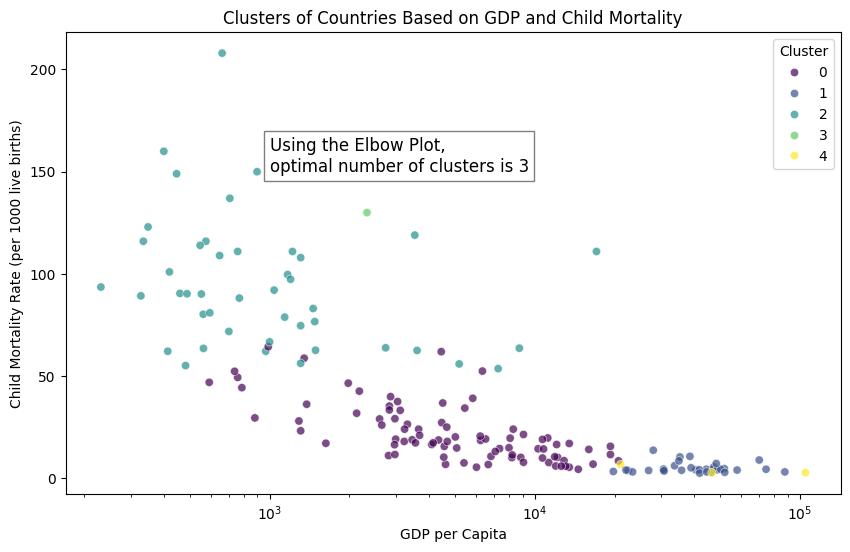

In [53]:
columns_to_use = ['child_mort', 'health', 'income', 'life_expec', 'total_fer', 'gdpp']
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

data_subset = data[features].dropna()  

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_subset)

inertia = []
range_k = range(1, 11)   

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.grid()

optimal_k = 5  
plt.axvline(optimal_k, color='red', linestyle='--', label='Optimal K = 5')
plt.text(optimal_k + 0.2, inertia[optimal_k-1], 'Optimal K = 5', color='red')

plt.legend()
plt.show()

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

print(data[['country'] + features + ['Cluster']].head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdpp', y='child_mort', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters of Countries Based on GDP and Child Mortality')
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality Rate (per 1000 live births)')

plt.text(1e3, 150, 'Using the Elbow Plot,\noptimal number of clusters is 3', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(title='Cluster')
plt.show()


For 5 clsuters, it seems to be even worse

### Prediction with NMF

In [60]:
X = data.drop(columns=['country', 'child_mort', 'inflation'])
y = data['child_mort']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nmf_model = NMF(
    n_components=3, 
    init='nndsvda', 
    solver='mu', 
    beta_loss='kullback-leibler', 
    l1_ratio=0.5, 
    max_iter=500  
)

W = nmf_model.fit_transform(X_train)
H = nmf_model.components_

X_reconstructed = np.dot(W, H)

y_pred_train = np.mean(X_reconstructed, axis=1)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on training data: {mse_train:.4f}')

W_test = nmf_model.transform(X_test)
X_test_reconstructed = np.dot(W_test, H)
y_pred_test = np.mean(X_test_reconstructed, axis=1)

mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on test data: {mse_test:.4f}')

Mean Squared Error on training data: 3212.4759
Mean Squared Error on test data: 2464.8330


I have tried using NMF just like the 4th week, here I'm trying to predict child mortality but the RMSE isn't good, it looks like a supervised learning method will be better here, we can also combine it with unsupervised techniques to reduces dimensions and then feed that to a supervised model.

Next I'll be using a DecisionTreeRegressor, I'm just trying to see if a supervised model is better, and we can see that it's much better.

In [64]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on training data: {mse_train:.4f}')

y_pred_test = dt_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on test data: {mse_test:.4f}')

Mean Squared Error on training data: 0.0000
Mean Squared Error on test data: 360.9929


# Summary and closing thoughts 

In this project, I have walked you through various unsupervised learning methods to analyze data on countries and their socio-economic and health factors. I began with exploratory data analysis (EDA) to understand the features of the dataset and their significance. This helped me visualize the data, making it easier to identify trends and patterns.

Then, I experimented with unsupervised techniques to determine which countries might need help, especially around child mortality. I looked at things like GDP per capita, health spending, and child mortality rates to categorize countries into meaningful clusters.

To improve my predictions, I decided to try a supervised learning approach using a Decision Tree Regressor. This method turned out to be more effective than the previous unsupervised techniques.

This project highlights the importance of understanding and analyzing data to make informed decisions about where humanitarian aid. 


Thank you so much for going through my project for the final week of this course and I hope you enjoed it.

# References 

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data